<a href="https://colab.research.google.com/github/anruki/Quantum-Programming-Applications/blob/main/KERNELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTAR LIBRERÍAS

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## CARGAR EL DATASET DE IRIS VERSICOLOR

In [ ]:
# 1. Cargar el dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos solo las primeras dos características para visualizar
y = iris.target

# 2. Convertir el problema a binario (usamos las clases 0 y 1)
X_binario = X[y != 2]
y_binario = y[y != 2]

## DATOS DE ENTRENAMIENTO Y TEST

In [ ]:
# 3. Dividir en conjunto de entrenamiento (80) y test (20)
X_train, X_test, y_train, y_test = train_test_split(X_binario, y_binario, test_size=0.5, random_state=42)

## KERNELS CUSTOMIZADOS

In [ ]:
# 4. Crear varios kernels
def custom_kernel(X, Y):
    """Este kernel es un kernel lineal simple que toma el producto interno entre dos vectores de características y le suma una constante."""
    return np.dot(X, Y.T) + 1

def polynomial_kernel(X, Y, degree=3, coef0=1):
    """Este kernel genera una transformación polinómica de grado 'degree'. Puede capturar relaciones no lineales entre las clases."""
    return (np.dot(X, Y.T) + coef0) ** degree

def laplacian_kernel(X, Y, gamma=0.1):
    """Este kernel mide la distancia Manhattan entre puntos y luego aplica una función exponencial para crear una frontera no lineal."""
    manhattan_dists = np.abs(X[:, np.newaxis] - Y).sum(axis=2)
    return np.exp(-gamma * manhattan_dists)

## FUNCIÓN PARA GRÁFICAR

In [ ]:
# Función para graficar la frontera de decisión del hiperespacio
def plot_decision_boundary(X_train, y_train, model, kernel_name):
    h = .02  # Step size in the mesh

    # Creamos una malla de puntos en el espacio 2D
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]

    # Predecimos en la malla para dibujar la frontera de decisión
    if model.kernel == 'precomputed':
        K_mesh = custom_kernel(X_mesh, X_train)
        Z = model.predict(K_mesh)
    else:
        Z = model.predict(X_mesh)

    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión y la línea divisoria
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles=['-'])  # Línea de división

    # Graficar los puntos de entrenamiento
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
    plt.title(f'Frontera de decisión con {kernel_name}')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    plt.show()

La función verifica si el modelo utiliza un kernel precomputado.
Si es así, `custom_kernel` calcula la matriz de kernel entre los puntos de la malla y los datos de entrenamiento antes de hacer la predicción (`Z`).
Si no, el modelo hace predicciones en los puntos de `X_mesh` directamente.


## ENTRENAR EL MODELO CON LOS 3 TIPOS DE KERNEL

Evaluando el kernel: custom_kernel
El kernel personalizado es un kernel lineal simple que mide la similaridad como el producto interno entre dos vectores de características.
Exactitud con custom_kernel: 100.00%



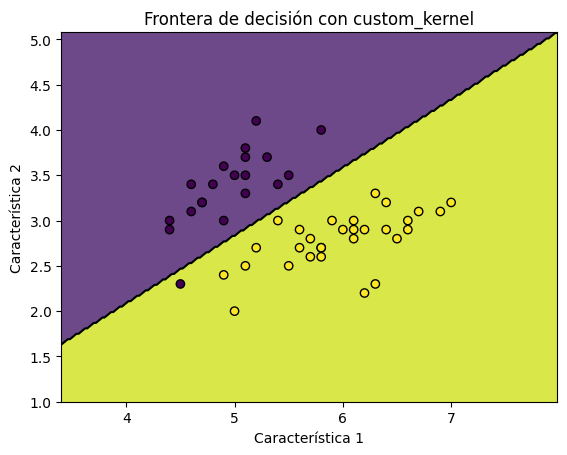

Evaluando el kernel: polynomial_kernel
El kernel polinomial de grado 3 transforma los datos en un espacio polinómico, lo que permite capturar relaciones no lineales entre las clases.
Exactitud con polynomial_kernel: 100.00%



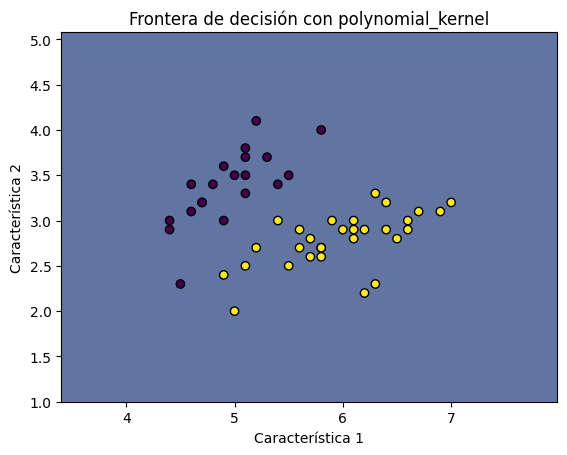

Evaluando el kernel: laplacian_kernel
El kernel laplaciano mide la distancia Manhattan entre los puntos y aplica una función exponencial, generando una frontera no lineal entre las clases.
Exactitud con laplacian_kernel: 100.00%



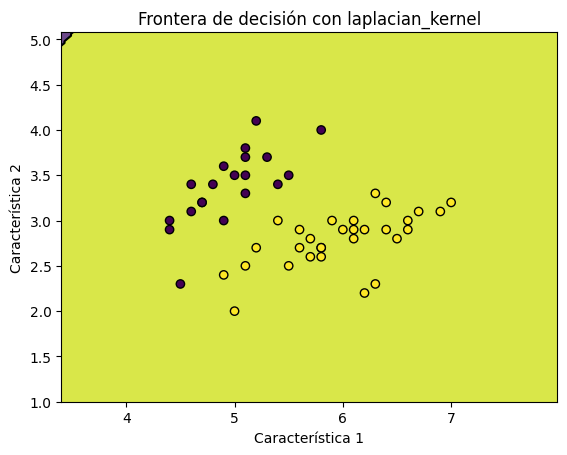


Este código realiza un análisis de clasificación con un modelo SVM utilizando diferentes kernels. Aquí están los pasos principales:

1. **Cargar y preprocesar los datos**:
   - Se carga el conjunto de datos Iris y se reducen sus características a las dos primeras para facilitar la visualización.
   - Se filtran las clases 0 y 1 (para hacerlo binario) y se dividen los datos en conjuntos de entrenamiento y prueba.

2. **Definir varios kernels**:
   - `custom_kernel`: Este es un kernel lineal que simplemente calcula el producto interno entre dos vectores de características y le suma una constante.
   - `polynomial_kernel`: Este kernel transforma los datos en un espacio de características polinómico (de grado 3), permitiendo capturar relaciones no lineales.
   - `laplacian_kernel`: Este kernel usa la distancia Manhattan entre los puntos y una función exponencial para crear fronteras no lineales.

3. **Precomputar los kernels**:
   - Los kernels son calculados previamente para los datos de

In [ ]:
# 5. Precalcular los kernels para el conjunto de entrenamiento y prueba
kernels = {
    'custom_kernel': custom_kernel,
    'polynomial_kernel': polynomial_kernel,
    'laplacian_kernel': laplacian_kernel
}

# Bucles para precalcular los kernels y entrenar el modelo
for name, kernel_func in kernels.items():
    print(f"Evaluando el kernel: {name}")

    # Explicación de cada kernel
    if name == 'custom_kernel':
        print("El kernel personalizado es un kernel lineal simple que mide la similaridad como el producto interno entre dos vectores de características.")
    elif name == 'polynomial_kernel':
        print("El kernel polinomial de grado 3 transforma los datos en un espacio polinómico, lo que permite capturar relaciones no lineales entre las clases.")
    elif name == 'laplacian_kernel':
        print("El kernel laplaciano mide la distancia Manhattan entre los puntos y aplica una función exponencial, generando una frontera no lineal entre las clases.")

    # Precalcular el kernel de entrenamiento (K_train)
    K_train = kernel_func(X_train, X_train)

    # Precalcular el kernel entre entrenamiento y test (K_test)
    K_test = kernel_func(X_test, X_train)

    # Entrenar el modelo SVM usando el kernel precalculado
    svm_model = SVC(kernel='precomputed')
    svm_model.fit(K_train, y_train)

    # Evaluar el modelo en el conjunto de test
    y_pred = svm_model.predict(K_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Exactitud con {name}: {accuracy * 100:.2f}%\n')

    # Graficar el hiperespacio generado
    plot_decision_boundary(X_train, y_train, svm_model, name)

# Explicación detallada del código
print("""
Este código realiza un análisis de clasificación con un modelo SVM utilizando diferentes kernels. Aquí están los pasos principales:

1. **Cargar y preprocesar los datos**:
   - Se carga el conjunto de datos Iris y se reducen sus características a las dos primeras para facilitar la visualización.
   - Se filtran las clases 0 y 1 (para hacerlo binario) y se dividen los datos en conjuntos de entrenamiento y prueba.

2. **Definir varios kernels**:
   - `custom_kernel`: Este es un kernel lineal que simplemente calcula el producto interno entre dos vectores de características y le suma una constante.
   - `polynomial_kernel`: Este kernel transforma los datos en un espacio de características polinómico (de grado 3), permitiendo capturar relaciones no lineales.
   - `laplacian_kernel`: Este kernel usa la distancia Manhattan entre los puntos y una función exponencial para crear fronteras no lineales.

3. **Precomputar los kernels**:
   - Los kernels son calculados previamente para los datos de entrenamiento y de prueba. Esto reduce el costo computacional durante el entrenamiento del SVM.

4. **Entrenamiento con SVM**:
   - El modelo SVM se entrena utilizando las matrices de kernels precomputadas. En lugar de recalcular el kernel durante el entrenamiento, simplemente se pasan las matrices `K_train` y `K_test` ya calculadas.

5. **Visualización de la frontera de decisión**:
   - Se genera una malla en el espacio bidimensional y se predice el valor de cada punto en la malla para dibujar la frontera de decisión.
   - La frontera se grafica junto con una línea divisoria que muestra exactamente dónde el modelo separa las dos clases.

6. **Explicaciones de cada kernel**:
   - Durante el ciclo de entrenamiento, se proporciona una pequeña explicación de cómo funciona cada kernel y qué tipo de relación entre los datos puede capturar.

7. **Resultados**:
   - Se imprime la exactitud del modelo para cada uno de los kernels y se visualiza el hiperespacio generado.

Este código permite probar varios tipos de kernels para comparar su rendimiento y ver cómo los diferentes kernels crean fronteras de decisión en los datos.""")



## AUMENTAR LAS DIMENSIONES DE LOS DATOS

In [ ]:
def aumentar_dimension(X):
    # Calculamos X^2 (element-wise cuadrado de cada característica)
    X_squared = X ** 2

    # Apilamos X con X^2 horizontalmente
    X_transformado = np.column_stack((X, X_squared))
    return X_transformado

X_train_transformado = aumentar_dimension(X_train)
X_test_transformado = aumentar_dimension(X_test)


## ENTRENAR EL MODELO

In [ ]:
# 5. Precomputar los kernels
K_train = custom_kernel(X_train_transformado, X_train_transformado)  # Kernel en el conjunto de entrenamiento
K_test = custom_kernel(X_test_transformado, X_train_transformado)    # Kernel entre test y entrenamiento

# 6. Entrenar el modelo SVM usando el kernel precomputado
svm_model = SVC(kernel='precomputed')
svm_model.fit(K_train, y_train)


SVC(kernel='precomputed')

## EVALUAR EL MODELO

In [ ]:
# 7. Evaluar el modelo en el conjunto de test
y_pred = svm_model.predict(K_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud con kernel personalizado: {accuracy * 100:.2f}%')

Exactitud con kernel personalizado: 100.00%


## GRAFICAR RESULTADOS

Exactitud con kernel personalizado: 100.00%


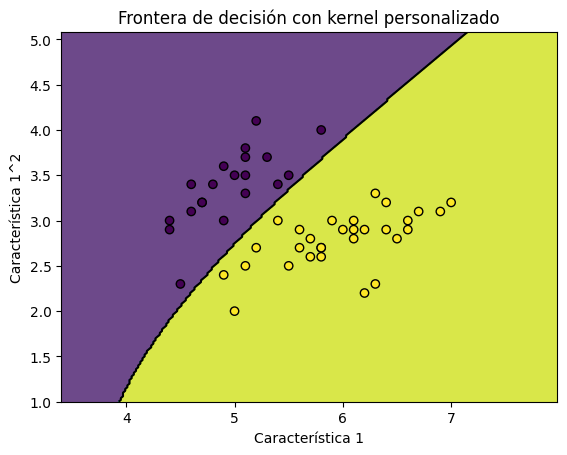

In [ ]:
# 8. Función para graficar la frontera de decisión
def plot_decision_boundary(X_train, y_train, model, kernel_func):
    h = .02  # Step size in the mesh

    # Creamos una malla de puntos en el espacio 2D
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]

    # Transformar la malla usando la función aumentar_dimension
    X_mesh_transformado = aumentar_dimension(X_mesh)

    # Precomputar el kernel en la malla de puntos
    K_mesh = kernel_func(X_mesh_transformado, X_train_transformado)

    # Predecir las etiquetas en la malla para graficar la frontera de decisión
    Z = model.predict(K_mesh)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles=['-'])  # Línea de división

    # Graficar los puntos de entrenamiento
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
    plt.title(f'Frontera de decisión con kernel personalizado')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 1^2')
    plt.show()

# 9. Graficar el hiperespacio generado
plot_decision_boundary(X_train_transformado, y_train, svm_model, custom_kernel)

## KERNEL CUÁNTICO

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

def aumentar_dimension_quantum(X):
    """
    Quantum kernel that expands a matrix X with two columns (representing (x, y) coordinates for each row)
    into a matrix with four columns, representing an expanded feature space.

    Args:
    X (array-like): Input feature matrix with shape (num_rows, 2).

    Returns:
    transformed_X (numpy array): Expanded feature matrix with shape (num_rows, 4),
                                 where each row is derived from the quantum state vector amplitudes.
    """
    # Initialize an empty list to store transformed rows
    transformed_data = []

    # Iterate over each row in X
    for i, row in enumerate(X):
        x_coord, y_coord = row[0], row[1]

        # Create a quantum circuit with 2 qubits
        qc = QuantumCircuit(2)

        # Apply Ry rotations on each qubit to encode x_coord and y_coord
        qc.ry(x_coord, 0)
        qc.ry(y_coord, 1)

        # Apply entanglement to correlate the features
        qc.cx(0, 1)

        # Show the circuit for the first row (as an example)
        if i == 0:
            print("Quantum circuit generated for the first row:")
            print(qc.draw())  # Display the circuit

        # Generate the state vector from the circuit
        state = Statevector.from_instruction(qc)

        # Extract the amplitudes of the state vector (4-dimensional vector)
        amplitudes = np.real(state.data)

        # Append the transformed vector to the list
        transformed_data.append(amplitudes)

    # Convert list to numpy array for matrix form
    transformed_X = np.array(transformed_data)

    return transformed_X

X_train_transformado = aumentar_dimension_quantum(X_train)
X_test_transformado = aumentar_dimension_quantum(X_test)


Quantum circuit generated for the first row:
     ┌─────────┐     
q_0: ┤ Ry(4.8) ├──■──
     ├─────────┤┌─┴─┐
q_1: ┤ Ry(3.4) ├┤ X ├
     └─────────┘└───┘
Quantum circuit generated for the first row:
      ┌───────┐      
q_0: ─┤ Ry(6) ├───■──
     ┌┴───────┴┐┌─┴─┐
q_1: ┤ Ry(2.7) ├┤ X ├
     └─────────┘└───┘


Quantum circuit generated for the first row:
     ┌─────────┐     
q_0: ┤ Ry(4.8) ├──■──
     ├─────────┤┌─┴─┐
q_1: ┤ Ry(3.4) ├┤ X ├
     └─────────┘└───┘
Quantum circuit generated for the first row:
      ┌───────┐      
q_0: ─┤ Ry(6) ├───■──
     ┌┴───────┴┐┌─┴─┐
q_1: ┤ Ry(2.7) ├┤ X ├
     └─────────┘└───┘


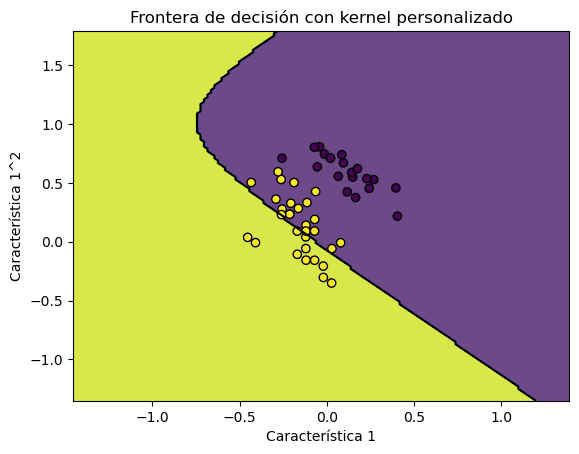

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

def aumentar_dimension_quantum(X):
    """
    Quantum kernel that expands a matrix X with two columns (representing (x, y) coordinates for each row)
    into a matrix with four columns, representing an expanded feature space.

    Args:
    X (array-like): Input feature matrix with shape (num_rows, 2).

    Returns:
    transformed_X (numpy array): Expanded feature matrix with shape (num_rows, 4),
                                 where each row is derived from the quantum state vector amplitudes.
    """
    # Initialize an empty list to store transformed rows
    transformed_data = []

    # Iterate over each row in X
    for i, row in enumerate(X):
        x_coord,  y_coord = row[0], row[1]

        # Create a quantum circuit with 2 qubits
        qc = QuantumCircuit(2)

        # Apply Ry rotations on each qubit to encode x_coord and y_coord
        qc.ry(x_coord, 0)
        qc.ry(y_coord, 1)

        # Apply entanglement to correlate the features
        qc.cx(0, 1)

        # Show the circuit for the first row (as an example)
        if i == 0:
            print("Quantum circuit generated for the first row:")
            print(qc.draw())  # Display the circuit

        # Generate the state vector from the circuit
        state = Statevector.from_instruction(qc)

        # Extract the amplitudes of the state vector (4-dimensional vector)
        amplitudes = np.real(state.data)

        # Append the transformed vector to the list
        transformed_data.append(amplitudes)

    # Convert list to numpy array for matrix form
    transformed_X = np.array(transformed_data)

    return transformed_X

X_train_transformado = aumentar_dimension_quantum(X_train)
X_test_transformado = aumentar_dimension_quantum(X_test)


# 5. Precomputar los kernels
K_train = custom_kernel(X_train_transformado, X_train_transformado)  # Kernel en el conjunto de entrenamiento
K_test = custom_kernel(X_test_transformado, X_train_transformado)    # Kernel entre test y entrenamiento

# 6. Entrenar el modelo SVM usando el kernel precomputado
svm_model = SVC(kernel='precomputed')
svm_model.fit(K_train, y_train)

# 7. Evaluar el modelo en el conjunto de test
y_pred = svm_model.predict(K_test)
accuracy = accuracy_score(y_test, y_pred)

# 8. Función para graficar la frontera de decisión
def plot_decision_boundary(X_train, y_train, model, kernel_func):
    h = .02  # Step size in the mesh

    # Creamos una malla de puntos en el espacio 2D
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]

    # Transformar la malla usando la función aumentar_dimension
    X_mesh_transformado = aumentar_dimension(X_mesh)

    # Precomputar el kernel en la malla de puntos
    K_mesh = kernel_func(X_mesh_transformado, X_train_transformado)

    # Predecir las etiquetas en la malla para graficar la frontera de decisión
    Z = model.predict(K_mesh)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles=['-'])  # Línea de división

    # Graficar los puntos de entrenamiento
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
    plt.title(f'Frontera de decisión con kernel personalizado')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 1^2')
    plt.show()

# 9. Graficar el hiperespacio generado
plot_decision_boundary(X_train_transformado, y_train, svm_model, custom_kernel)

## PAULI FEATURE MAP

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

def aumentar_dimension_quantum(X):
    """
    Quantum kernel that expands a matrix X with two columns (representing (x, y) coordinates for each row)
    into a matrix with four columns, representing an expanded feature space.

    Args:
    X (array-like): Input feature matrix with shape (num_rows, 2).

    Returns:
    transformed_X (numpy array): Expanded feature matrix with shape (num_rows, 4),
                                 where each row is derived from the quantum state vector amplitudes.
    """
    # Initialize an empty list to store transformed rows
    transformed_data = []

    # Iterate over each row in X
    for i, row in enumerate(X):
        x_coord,  y_coord = row[0], row[1]

        # Create a quantum circuit with 2 qubits
        qc = QuantumCircuit(2)

        # Apply Ry rotations on each qubit to encode x_coord and y_coord
        qc.ry(x_coord, 0)
        qc.ry(y_coord, 1)

        # Apply entanglement to correlate the features
        qc.cx(0, 1)

        # Show the circuit for the first row (as an example)
        if i == 0:
            print("Quantum circuit generated for the first row:")
            print(qc.draw())  # Display the circuit

        # Generate the state vector from the circuit
        state = Statevector.from_instruction(qc)

        # Extract the amplitudes of the state vector (4-dimensional vector)
        amplitudes = np.real(state.data)

        # Append the transformed vector to the list
        transformed_data.append(amplitudes)

    # Convert list to numpy array for matrix form
    transformed_X = np.array(transformed_data)

    return transformed_X

X_train_transformado = aumentar_dimension_quantum(X_train)
X_test_transformado = aumentar_dimension_quantum(X_test)


# 5. Precomputar los kernels
K_train = custom_kernel(X_train_transformado, X_train_transformado)  # Kernel en el conjunto de entrenamiento
K_test = custom_kernel(X_test_transformado, X_train_transformado)    # Kernel entre test y entrenamiento

# 6. Entrenar el modelo SVM usando el kernel precomputado
svm_model = SVC(kernel='precomputed')
svm_model.fit(K_train, y_train)

# 7. Evaluar el modelo en el conjunto de test
y_pred = svm_model.predict(K_test)
accuracy = accuracy_score(y_test, y_pred)

# 8. Función para graficar la frontera de decisión
def plot_decision_boundary(X_train, y_train, model, kernel_func):
    h = .02  # Step size in the mesh

    # Creamos una malla de puntos en el espacio 2D
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]

    # Transformar la malla usando la función aumentar_dimension
    X_mesh_transformado = aumentar_dimension(X_mesh)

    # Precomputar el kernel en la malla de puntos
    K_mesh = kernel_func(X_mesh_transformado, X_train_transformado)

    # Predecir las etiquetas en la malla para graficar la frontera de decisión
    Z = model.predict(K_mesh)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.contour(xx, yy, Z, colors='k', levels=[0.5], linestyles=['-'])  # Línea de división

    # Graficar los puntos de entrenamiento
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o')
    plt.title(f'Frontera de decisión con kernel personalizado')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 1^2')
    plt.show()

# 9. Graficar el hiperespacio generado
plot_decision_boundary(X_train_transformado, y_train, svm_model, custom_kernel)